# DVHの表示と活用法

- **1. 治療計画装置からDVHデータをExportする**
<br><br>
- **2. Pythonでテキストデータを読み込む**
    - **2.1. read()とreadlines()**
    - **2.2. DVHのtxtファイルを読み込む**
<br><br>
- **3. DVHの表示**
    - **3.1. 行番号を調べる**
    - **3.2. DVHデータを抽出する** 
    - **3.3. グラフ化の準備をする**
    - **3.4. Matplotlibでグラフを表示する**
<br><br>
- **4. 必要な情報の抽出**

***

## 〇 1. 治療計画装置からDVHデータをExportする

## 〇 2. Pythonでテキストデータを読み込む

### ● 2.1. read()とreadlines()

open() を使ってtxtファイルを開き、**read()** を使ってtxtファイルを読み込みます。  
下のセルをそのまま実行（ Run または Shift + Enter ）してみてください。  

In [1]:
f = open( 'number.txt', encoding = 'utf-8' )    
numbers = f.read()
f.close()

print(numbers)

1
2
3
4
5
6
7
8
9


次に**readlines()** を使ってtxtファイルを読み込みます。  

In [2]:
f = open( 'number.txt', encoding = 'utf-8' )    
numbers = f.readlines()
f.close()

print(numbers)

['1\n', '2\n', '3\n', '4\n', '5\n', '6\n', '7\n', '8\n', '9']


### ● 2.2. DVHのtxtファイルを読み込む

readlines()でDVHのtxtファイルを読み込みます。

In [3]:
f = open( 'DVH1_short.txt', encoding = 'utf-8' )    
data = f.readlines()
f.close()

print(data)

['\ufeffPatient Name         : Patient, Prostate1\n', 'Patient ID           : 11111111\n', 'Comment              : DVHs for one plan\n', 'Date                 : Thursday, June 06, 2019 8:53:27 PM\n', 'Exported by          : SysAdmin\n', 'Type                 : Cumulative Dose Volume Histogram\n', 'Description          : The cumulative DVH displays the percentage (relative)\n', '                       or volume (absolute) of structures that receive a dose\n', '                       equal to or greater than a given dose.\n', '\n', 'Plan: 01_Prostate_r\n', 'Course: 01\n', 'Plan Status: Planning Approved Wednesday, January 30, 2019 8:09:05 AM by XXXXX\n', 'Prescribed dose [Gy]: 78.000\n', '% for dose (%): 100.0\n', '\n', 'Structure: Rectal Wall\n', 'Approval Status: Approved\n', 'Plan: 01_Prostate_r\n', 'Course: 01\n', 'Volume [cm³]: 21.7\n', 'Dose Cover.[%]: 100.0\n', 'Sampling Cover.[%]: 100.0\n', 'Min Dose [%]: 1.9\n', 'Max Dose [%]: 97.2\n', 'Mean Dose [%]: 52.8\n', 'Modal Dose [%]: 3

リスト型のデータはその要素番号を指定することで，要素を取り出すことができます。（インデックス参照）

In [4]:
# Patient IDを出力します
print(data[1])

Patient ID           : 11111111



#### **練習1**  
リストのインデックス参照を使って，Prescribed dose [Gy] を出力してください。

In [5]:
# Prescribed dose [Gy] を出力してください


## 〇 3. DVHの表示

### ● 3.1. 行番号を調べる

基本的なfor文の例です。

In [6]:
for i in data:
    print(i)

﻿Patient Name         : Patient, Prostate1

Patient ID           : 11111111

Comment              : DVHs for one plan

Date                 : Thursday, June 06, 2019 8:53:27 PM

Exported by          : SysAdmin

Type                 : Cumulative Dose Volume Histogram

Description          : The cumulative DVH displays the percentage (relative)

                       or volume (absolute) of structures that receive a dose

                       equal to or greater than a given dose.



Plan: 01_Prostate_r

Course: 01

Plan Status: Planning Approved Wednesday, January 30, 2019 8:09:05 AM by XXXXX

Prescribed dose [Gy]: 78.000

% for dose (%): 100.0



Structure: Rectal Wall

Approval Status: Approved

Plan: 01_Prostate_r

Course: 01

Volume [cm³]: 21.7

Dose Cover.[%]: 100.0

Sampling Cover.[%]: 100.0

Min Dose [%]: 1.9

Max Dose [%]: 97.2

Mean Dose [%]: 52.8

Modal Dose [%]: 3.2

Median Dose [%]: 51.8

STD [%]: 30.3

Equiv. Sphere Diam. [cm]: 3.5

Conformity Index: N/A

Gradient Measur

for文とenumerate()関数を使って，dataの要素番号（＝txtファイルの行番号）を調べます。  
下のセルをそのまま実行してみてください。  

In [7]:
for i in enumerate(data):
    print(i)

(0, '\ufeffPatient Name         : Patient, Prostate1\n')
(1, 'Patient ID           : 11111111\n')
(2, 'Comment              : DVHs for one plan\n')
(3, 'Date                 : Thursday, June 06, 2019 8:53:27 PM\n')
(4, 'Exported by          : SysAdmin\n')
(5, 'Type                 : Cumulative Dose Volume Histogram\n')
(6, 'Description          : The cumulative DVH displays the percentage (relative)\n')
(7, '                       or volume (absolute) of structures that receive a dose\n')
(8, '                       equal to or greater than a given dose.\n')
(9, '\n')
(10, 'Plan: 01_Prostate_r\n')
(11, 'Course: 01\n')
(12, 'Plan Status: Planning Approved Wednesday, January 30, 2019 8:09:05 AM by XXXXX\n')
(13, 'Prescribed dose [Gy]: 78.000\n')
(14, '% for dose (%): 100.0\n')
(15, '\n')
(16, 'Structure: Rectal Wall\n')
(17, 'Approval Status: Approved\n')
(18, 'Plan: 01_Prostate_r\n')
(19, 'Course: 01\n')
(20, 'Volume [cm³]: 21.7\n')
(21, 'Dose Cover.[%]: 100.0\n')
(22, 'Sampling Cover.[

### ● 3.2. DVHデータを抽出する

Rectal WallのDVHデータを抽出します。下のセルを実行してみてください。

In [8]:
# Rectal WallのDVHデータ
print(data[34:44])

['                0                   0                       100\n', '               10                 7.8                   83.6145\n', '               20                15.6                   79.5203\n', '               30                23.4                   76.8293\n', '               40                31.2                   71.0453\n', '               50                  39                   52.2919\n', '               60                46.8                   41.5127\n', '               70                54.6                   33.3439\n', '               80                62.4                   26.3351\n', '               90                70.2                   16.3178\n']


#### **練習2**  
PTV-RectumのDVHデータを抽出してください。

In [ ]:
# PTV-RectumのDVHデータ


### ● 3.3. グラフ化の準備をする

① 3.2.で抽出したRectal WallのDVHデータから，半角スペースや改行文字を取り除きます。

In [9]:
DVH_data = []

for i in data[34:45]:
    DVH_data.append(i.split())
    
print(DVH_data)

[['0', '0', '100'], ['10', '7.8', '83.6145'], ['20', '15.6', '79.5203'], ['30', '23.4', '76.8293'], ['40', '31.2', '71.0453'], ['50', '39', '52.2919'], ['60', '46.8', '41.5127'], ['70', '54.6', '33.3439'], ['80', '62.4', '26.3351'], ['90', '70.2', '16.3178'], ['100', '78', '0']]


② ①でつくったDVH_dataからx軸（Dose[Gy]），y軸（Volume[%]）の値を抽出します。

In [10]:
x = []
y = []

for i, j, k in DVH_data:
    x.append(float(j))
    y.append(float(k))

print(x)
print(y)

[0.0, 7.8, 15.6, 23.4, 31.2, 39.0, 46.8, 54.6, 62.4, 70.2, 78.0]
[100.0, 83.6145, 79.5203, 76.8293, 71.0453, 52.2919, 41.5127, 33.3439, 26.3351, 16.3178, 0.0]


#### **練習3**  
PTV-RectumのDVHデータからx軸（Dose[%]），y軸（Volume[%]）を抽出しましょう。

In [ ]:
# for文を使ってDVH_data2に半角スペースや改行文字を取り除いたDVHデータを追加してください
DVH_data2 = []




# DVH_data2からx軸（Dose[%]），y軸（Volume[%]）を抽出しましょう
x2 = []
y2 = []


    


# x軸，y軸をprint()関数で表示しましょう。



### ● 3.4. Matplotlibでグラフを表示する

Rectal WallのDVHを表示します。  

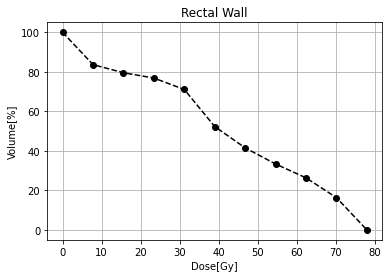

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(x, y, c='black', ls='--', marker='o')    # グラフ作成

plt.title('Rectal Wall')    # タイトル
plt.xlabel('Dose[Gy]')      # x軸ラベル
plt.ylabel('Volume[%]')     # y軸ラベル
plt.grid()                  # グリッド表示

・matplotlib.pyplot.plotの概要：https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html  
・色の種類の参考：https://pythondatascience.plavox.info/matplotlib/色の名前  
・線のスタイルの参考：https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_color  
・マーカーの種類の参考：https://matplotlib.org/api/markers_api.html#module-matplotlib.markers  

#### **練習4**  
PTV-RectumのDVHを表示してみましょう。

In [ ]:
# グラフを作成し，タイトルや軸ラベルなどをつけてください






## 〇 4. 必要な情報の抽出

### ● 4.1. データの補間

txtファイルから読み込んだDVHデータは離散値であるため、データの補間が必要な場合があります。

Scipyのinterpolateモジュールを用いることで様々な方法でデータの補間をすることができます。  
今回はinterp1dを用いて，Rectal WallののV40Gy[%]を求めましょう。

In [12]:
from scipy.interpolate import interp1d

f = interp1d(x,y)

print(f(40))

50.90995128205128


#### **練習5**  
PTV-RectumのD95%[%]を求めてみましょう。

In [ ]:
# interp1d()で補間をして，print()でD95%[%]を出力してください

f2 = 


#### **参考**  
補間方法の違いを確認してみましょう。

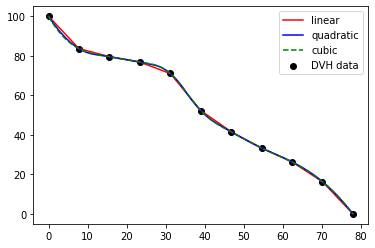

In [13]:
import numpy as np
tt = np.linspace(0, 78, 1000)

# 線形補間
f1 = interp1d(x,y)
y_1 = f1(tt)

# 2次スプライン補間
f2 = interp1d(x,y,kind="quadratic")
y_2 = f2(tt)

# 3次スプライン補間
f3 = interp1d(x,y,kind="cubic")
y_3 = f3(tt)

fig= plt.figure()
FIM = fig.add_subplot(111)
FIM.scatter(x,y,c='black',marker="o",label="DVH data")
FIM.plot(tt, y_1, "r", label="linear")
FIM.plot(tt, y_2, "-b", label="quadratic")
FIM.plot(tt, y_3, "--g", label="cubic")
plt.legend()
plt.show()

## 〇 5. 練習問題の解答例

### ● 練習1

In [14]:
# Prescribed dose [Gy] を出力してください
print(data[13])

Prescribed dose [Gy]: 78.000



### ● 練習2

In [15]:
# PTV-RectumのDVHデータ
print(data[64:75])

['                0                   0                       100\n', '               10                 7.8                       100\n', '               20                15.6                       100\n', '               30                23.4                       100\n', '               40                31.2                       100\n', '               50                  39                       100\n', '               60                46.8                       100\n', '               70                54.6                       100\n', '               80                62.4                       100\n', '               90                70.2                   99.9773\n', '              100                  78                   61.9731\n']


### ● 練習3

In [16]:
# for文を使ってDVH_data2に半角スペースや改行文字を取り除いたDVHデータを追加してください
DVH_data2 = []
for i in data[64:75]:
    DVH_data2.append(i.split())

# DVH_data2からx軸（Dose[%]），y軸（Volume[%]）を抽出しましょう
x2 = []
y2 = []
for i, j, k in DVH_data2:
    x2.append(float(i))
    y2.append(float(k))

# x軸，y軸をprint()関数で表示しましょう。
print(x2)
print(y2)

[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.9773, 61.9731]


### ● 練習4

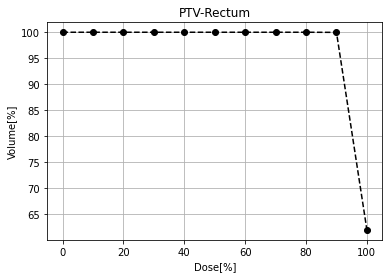

In [17]:
# グラフを作成し，タイトルや軸ラベルなどをつけてください
plt.plot(x2, y2, c='black', ls='--', marker='o')

plt.title('PTV-Rectum')
plt.xlabel('Dose[%]')
plt.ylabel('Volume[%]')
plt.grid()

### ● 練習5

In [18]:
# interp1d()で補間をして，print()でD95%[%]を出力してください
f2 = interp1d(y2, x2)
print(f2(95))

91.30967103635913


In [20]:
%load_ext watermark

%watermark -v -m -p numpy,scipy,matplotlib

print(" ")

%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.9
IPython 7.18.1

numpy 1.19.1
scipy 1.5.2
matplotlib 3.3.1

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
CPU cores  : 16
interpreter: 64bit
 
last updated: Thu Sep 03 2020 16:35:09 ???? (?W???)
